In [401]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [402]:
#Leyendo DataSets
# Optimización de la lectura de los datasets, eliminando la columna 'Unnamed: 0' directamente
df_1 = pd.read_csv("./estadisticas_peleador_limpio.csv", index_col=0)
df_2 = pd.read_csv("./Enfrentamientos_limpio.csv", index_col=0)
df_3 = pd.read_csv("./Categorias_por_peso.csv", index_col=0)



In [403]:
df_1.head()


,Nombre,Pais,Victorias,Derrotas,Altura,Peso,Alcance,Guardia,Edad,Golpes_min,Golpes_acer,Golpes_abs,Golpes_def,Derribos_med,Derribos_acer,Derribos_def,Sumision_int
0,Amanda Ribas,Brasil,12.0,5.0,160.02,56.70,167.64,Ortodoxo,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,Estados Unidos,13.0,6.0,165.10,56.70,165.10,Ortodoxo,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Justin Tafa,Nueva Zelanda,7.0,4.0,182.88,119.75,187.96,Zurdo,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
3,Edmen Shahbazyan,Estados Unidos,13.0,4.0,187.96,83.91,190.50,Ortodoxo,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6
4,Payton Talbott,Estados Unidos,8.0,0.0,177.80,61.23,177.80,Ambidiestro,25.0,8.05,0.54,3.58,0.51,0.00,0.00,0.90,0.5


In [404]:
df_2.head()

,Evento,Día,Donde,Ganador,Perdedor,Division,Metodo,Detalles,Round,Tiempo
0,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,Peso Medio,KO/TKO,Golpes,1.0,4:33
1,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,Peso Gallo,KO/TKO,Golpes,2.0,0:21
2,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,Peso Pluma,SUB,Estrangulación Trasera,2.0,1:50
3,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Fernando Padilla,Luis Pajuelo,Peso Pluma,SUB,Estrangulación D'Arce,1.0,2:45
4,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Julian Erosa,Ricardo Ramos,Peso Pluma,SUB,Estrangulación Guillotina,1.0,2:15


In [405]:
df_3.head()

,Division,Peso (kg)
0,Peso Medio,Hasta 84 kg
1,Peso Gallo,Hasta 61.2 kg
2,Peso Pluma,Hasta 65.8 kg
3,Peso Pesado,Hasta 120.2 kg
4,Peso Gallo,Hasta 61.2 kg


# Resolucion de hipotesis:
1. Relación entre la guardia y el Éxito en ambos géneros 🤼



In [406]:
df_1_filtro = df_1[['Nombre', 'Guardia']]
df_2_filtro = df_2[['Ganador', 'Perdedor']]

In [407]:
ganadores = pd.merge(df_2_filtro, df_1_filtro, left_on='Ganador', right_on='Nombre', how='left')  #Merge
ganadores = ganadores[['Ganador', 'Guardia']].rename(columns={'Guardia': 'Guardia_ganador'})      #Cambiar nombre

perdedores = pd.merge(df_2_filtro, df_1_filtro, left_on='Perdedor', right_on='Nombre', how='left') #Merge
perdedores = perdedores[['Perdedor', 'Guardia']].rename(columns={'Guardia': 'Guardia_perdedor'})   #Cambiar nombre

df_combinado = pd.merge(ganadores, perdedores, left_index=True, right_index=True)                             #Combinar
df_combinado = df_combinado.dropna(subset=['Ganador', 'Guardia_ganador', 'Perdedor', 'Guardia_perdedor'])     #Eliminar NaN's

df_combinado

,Ganador,Guardia_ganador,Perdedor,Guardia_perdedor
1,Payton Talbott,Ambidiestro,Cameron Saaiman,Zurdo
2,Youssef Zalal,Ambidiestro,Billy Quarantillo,Ortodoxo
4,Julian Erosa,Zurdo,Ricardo Ramos,Ortodoxo
5,Marcin Tybura,Ortodoxo,Tai Tuivasa,Zurdo
6,Macy Chiasson,Ortodoxo,Pannie Kianzad,Ortodoxo
...,...,...,...,...
3015,Jon Jones,Ortodoxo,Brandon Vera,Ortodoxo
3070,Vitor Belfort,Zurdo,Rich Franklin,Zurdo
3078,Nate Diaz,Zurdo,Melvin Guillard,Ortodoxo
3177,Jeremy Stephens,Ortodoxo,Rafael Dos Anjos,Zurdo


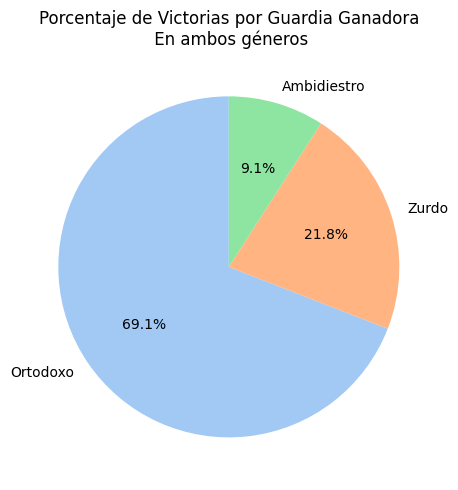

In [408]:
contador_guardias = df_combinado['Guardia_ganador'].value_counts()

porcentajes_guardias = (contador_guardias / contador_guardias.sum()) * 100

plt.figure(figsize=(5, 5))
plt.pie(porcentajes_guardias, labels=porcentajes_guardias.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Porcentaje de Victorias por Guardia Ganadora\n En ambos géneros")

plt.tight_layout()
plt.show()


#Dato Curioso: La prevalencia de zurdos en el mundo es del 10,6 %,

2. Probabilidad de ganar respecto a una buena defensa de derribo? 🥋


In [409]:
df_1_filtro = df_1[['Victorias', 'Derrotas','Derribos_def']]

In [410]:
df_1_filtro.loc[:,'Total_Peleas'] = df_1_filtro['Victorias'] + df_1_filtro['Derrotas']
df_1_filtro.loc[:,'Probabilidad_Ganar'] = df_1_filtro['Victorias'] / df_1_filtro['Total_Peleas']

umbral_defensa = 0.6                                            
df_buena_defensa = df_1_filtro[df_1_filtro['Derribos_def'] >= umbral_defensa]

probabilidad_promedio_ganar = df_buena_defensa['Probabilidad_Ganar'].mean()
print(f"Probabilidad promedio de ganar con buena defensa de derribos: {(round(probabilidad_promedio_ganar,2))*100} %")


Probabilidad promedio de ganar con buena defensa de derribos: 75.0 %


C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_19004\893912401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_filtro.loc[:,'Total_Peleas'] = df_1_filtro['Victorias'] + df_1_filtro['Derrotas']
C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_19004\893912401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_filtro.loc[:,'Probabilidad_Ganar'] = df_1_filtro['Victorias'] / df_1_filtro['Total_Peleas']


3. Rendimiento por Género 🚺🤼‍♂️


Del 1er dataset:
wins (número de victorias)
name (nombre del luchador)


Del 2do dataset:
r_fighter, b_fighter (relacionar con name)
method, method_detailed (para analizar métodos de finalización)
weight_class (para identificar si la pelea fue en una división masculina o femenina)


Del 3er dataset:
division (para categorizar entre divisiones femeninas y masculinas)



4. Diferencia de Edades 👵👦

Del 1er dataset:
age (edad del luchador)
name (nombre del luchador)

Del 2do dataset:
r_fighter, b_fighter (nombres de los luchadores)
method, status (resultado de la pelea para saber quién ganó)

In [411]:
list(df_3["Division"])

['Peso Medio',
 'Peso Gallo',
 'Peso Pluma',
 'Peso Pesado',
 'Peso Gallo',
 'Peso Ligero',
 'Peso Mosca',
 'Peso Paja',
 'Peso Welter',
 'Peso Semipesado',
 'Peso Pactado',
 'Peso Super Pesado',
 'Peso Abierto']

5. Probabilidad de ganar por kO con golpes en cualquier division

In [412]:
df_2_filtro = df_2[["Ganador","Division","Metodo","Detalles"]]


In [413]:
division_concreta = 'Peso Pesado'

conteo = df_2_filtro[df_2_filtro['Division'] == division_concreta].shape[0]
print(f"Número de peleadores en {division_concreta}: {conteo}")



Número de peleadores en Peso Pesado: 447


In [414]:
dict_golpes = {
    "Punches": "Golpes",
    "Kick": "Patada",
    "Punch": "Puño",
    "Elbows": "Codos",
    "Elbow": "Codo",
    "Flying Knee": "Rodilla Voladora",
    "Knees": "Rodillas",
    "Knee": "Rodilla",
    "Kicks": "Patadas",
    "Spinning Back Kick": "Patada Circular",
    "Spinning Back Fist": "Puñetazo Circular",
    "Spinning Back Elbow": "Codazo Circular",
    "Headbutts": "Cabezazos",
    "Slam": "Golpe Bajo"
}

golpes_list = list(dict_golpes.values())

df_ko_golpes = df_2_filtro[
    (df_2_filtro['Metodo'] == 'KO/TKO') & 
    (df_2_filtro['Detalles'].str.contains('|'.join(golpes_list), na=False))
]
conteo_ko_por_division = df_ko_golpes['Division'].value_counts()
conteo_ko_por_division

Division
Peso Welter          385
Peso Medio           351
Peso Pesado          351
Peso Ligero          349
Peso Semipesado      276
Peso Gallo           222
Peso Pluma           195
Peso Mosca           107
Peso Paja             38
Peso Abierto          36
Peso Pactado          18
Peso Super Pesado      1
Name: count, dtype: int64

In [415]:
conteo_ko_por_division = df_ko_golpes['Division'].value_counts()
conteo_ko_por_division

Division
Peso Welter          385
Peso Medio           351
Peso Pesado          351
Peso Ligero          349
Peso Semipesado      276
Peso Gallo           222
Peso Pluma           195
Peso Mosca           107
Peso Paja             38
Peso Abierto          36
Peso Pactado          18
Peso Super Pesado      1
Name: count, dtype: int64

In [416]:
conteo_total_por_division = df_2_filtro['Division'].value_counts()
conteo_total_por_division

Division
Peso Ligero          640
Peso Welter          626
Peso Medio           569
Peso Pesado          447
Peso Semipesado      385
Peso Gallo           385
Peso Pluma           323
Peso Mosca           223
Peso Paja             97
Peso Abierto          75
Peso Pactado          33
Peso Super Pesado      1
Name: count, dtype: int64

In [419]:
probabilidad_ko = conteo_ko_por_division / conteo_total_por_division
probabilidad_ko.sort_values(ascending = False)

Division
Peso Super Pesado    1.000000
Peso Pesado          0.785235
Peso Semipesado      0.716883
Peso Medio           0.616872
Peso Welter          0.615016
Peso Pluma           0.603715
Peso Gallo           0.576623
Peso Pactado         0.545455
Peso Ligero          0.545312
Peso Abierto         0.480000
Peso Mosca           0.479821
Peso Paja            0.391753
Name: count, dtype: float64

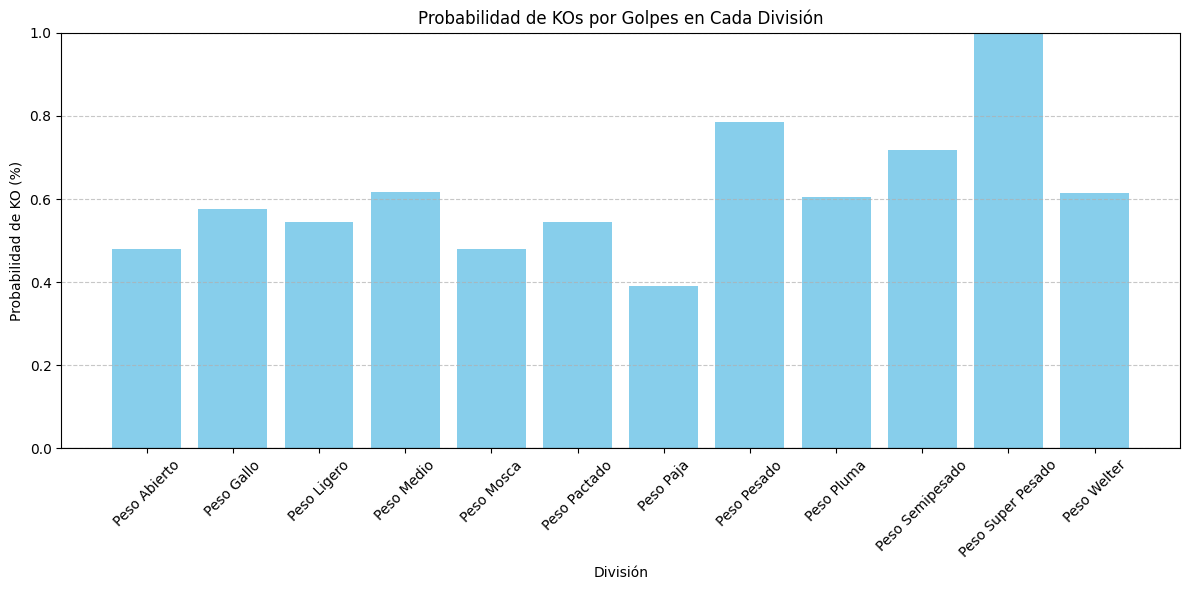

In [420]:
plt.figure(figsize=(12, 6))
plt.bar(probabilidad_ko.index, probabilidad_ko.values, color='skyblue')
plt.title('Probabilidad de KOs por Golpes en Cada División')
plt.xlabel('División')
plt.ylabel('Probabilidad de KO (%)')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Limitar el eje Y de 0 a 1
plt.axhline(0, color='black', lw=0.8)  # Línea en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de cuadrícula
plt.tight_layout()
plt.show()

6. EXTRA: Altura y Resultados de Pelea 📏🏆

Del 1er dataset:
height (altura del luchador)
name (nombre del luchador)


Del 2do dataset:
r_fighter, b_fighter (nombres de los luchadores)
status (resultado de la pelea para saber quién ganó)

&nbsp;

&nbsp;